# Best Neighborhood in Pittsburgh
## Team High Five

### Introduction
All datasets are from WPRDC and we use two factors to decide the best neighborhood in Pittsburgh.

Factors:
* Crime rate
* Median Age at Death

We use three datasets:
* Police Incident Blotter 
* Total Population
* Median Age at Death

A neighborhood has a higher crime rate indicate the area is not safe enough. No one wants to live a place has a lot of crime happens. 

People who live in a neighborhood with has higher median death age indicate that the neighborhood might have a good environment, public facilities, and good medical service. Because everyone wants to live longer. 

### The Metric

#### Crime Rate
we figure out the crime rate as total crimes divided by the total population. 

#### Median Age at Death
We used the Median Age at Death to to determine which neighborhood has highest death age

### The best neighborhood is that have the lowest crime rate and highest death age

### Conclusion

#### The best neighborhood in Pittsburgh is Banksville
![alt text](https://memesbams.com/wp-content/uploads/2017/10/21-Much-Wow-Dog-Meme.jpg)

Xinyi (Nicole): I have never been to Banksville.  Because I am not from Pittsburgh,  I do not know much about the neighborhoods here. I only know some areas around the University.  My personal favorite neighborhood is Squirrel Hills not only because I live in Squirrel Hills but also it is very safe, quiet and has many good restaurants. 

Alex: Perosonally I have driven through Banksville and I live very close to it but I have never spent much time there, from what I have seen though it does seem very nice, so this does not come as a surprise to me.


In [34]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

#### import population dataset
Figure out the TOP 20 

In [35]:

population = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                           parse_dates=True)
# make new dataframe
total_pop = population[['Neighborhood','Estimate; Total']]
total_pop.columns = ['Neighborhood', 'Total Population']
total_pop.set_index('Neighborhood',inplace=True)
total_pop.astype(int)
top_pop = total_pop.sort_values('Total Population', ascending = False).head(20)
top_pop

,Total Population
Neighborhood,
Squirrel Hill South,16042.0
Shadyside,13562.0
Brookline,13160.0
Squirrel Hill North,11336.0
Carrick,10122.0
North Oakland,9602.0
Mount Washington,8743.0
Bloomfield,8669.0
Beechview,8078.0


#### Visual representations
As we can see that Squirrel Hill South has the largest population


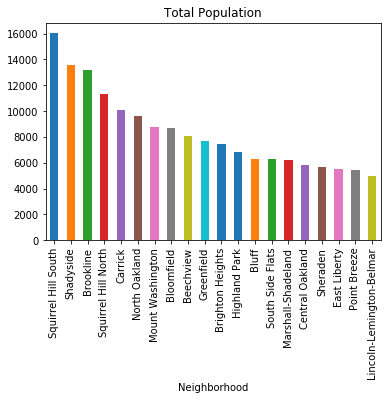

In [36]:
top_pop.loc[:,'Total Population'].plot(kind="bar", title = "Total Population")
plt.show()

## Crime Rate

In [37]:
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e",parse_dates=True)

# make new dataframe

#total_crimes = crimes[['INCIDENTNEIGHBORHOOD','OFFENSES']]
#total_crimes = crimes.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Total Crimes'})
#total_crimes = total_crimes.groupby('Neighborhood').count()
#total_crimes = total_crimes.sort_values('Total Crimes', ascending = False).head(20)
#total_crimes
crimes = crimes.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Total Crimes'})
total_crimes = crimes.loc[:,["Total Crimes","Neighborhood"]].groupby('Neighborhood').count()
top_crimes = total_crimes.sort_values('Total Crimes', ascending = False).head(20)
top_crimes

,Total Crimes
Neighborhood,
South Side Flats,11865
Central Business District,9026
Carrick,6715
Bloomfield,5579
Shadyside,5171
Squirrel Hill South,4359
Homewood South,4355
East Liberty,4348
Golden Triangle/Civic Arena,4278


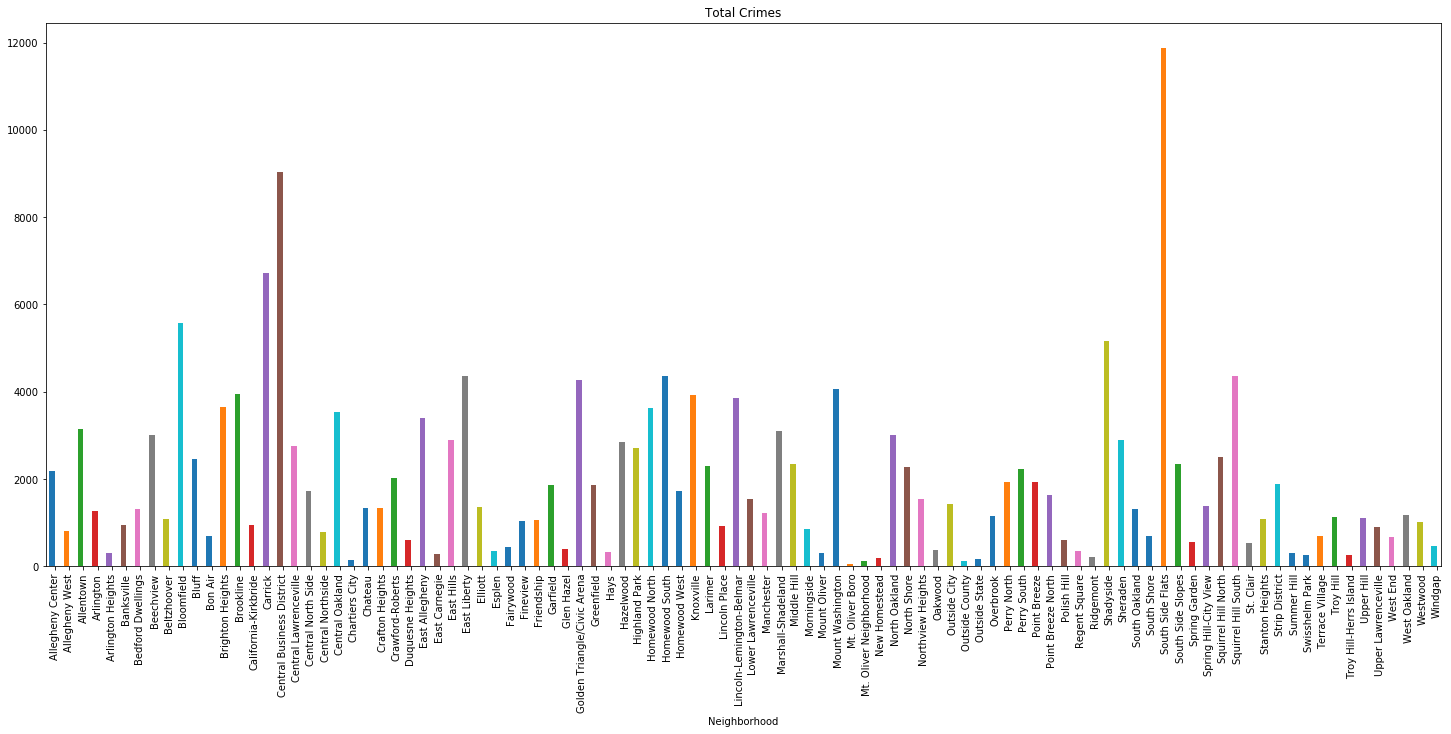

In [38]:
total_crimes.loc[:,'Total Crimes'].plot(kind="bar", title = "Total Crimes",width = 0.4, figsize=(25,10), position=1)
plt.show()

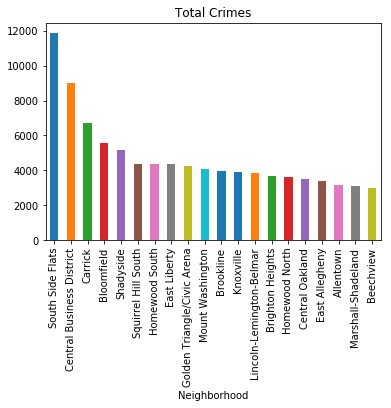

In [39]:
top_crimes.loc[:,'Total Crimes'].plot(kind="bar", title = "Total Crimes")
plt.show()

In [40]:
total_crimes['Total Population'] = total_pop['Total Population']
total_crimes['Crimes Rate'] = total_crimes.loc[:,"Total Crimes"]/total_crimes.loc[:,'Total Population']
total_crimes.head()

,Total Crimes,Total Population,Crimes Rate
Neighborhood,,,
Allegheny Center,2182,1411.0,1.546421
Allegheny West,801,343.0,2.335277
Allentown,3139,2558.0,1.227131
Arlington,1256,1852.0,0.678186
Arlington Heights,300,272.0,1.102941


#### reorder the Crimes Rate by ascending
    Chateau has highest crimes rate

In [41]:
total_crimes_as = total_crimes.sort_values('Crimes Rate', ascending = False).head(25)
total_crimes_as


,Total Crimes,Total Population,Crimes Rate
Neighborhood,,,
Chateau,1331,3.0,443.666667
South Shore,692,12.0,57.666667
North Shore,2278,205.0,11.112195
West End,663,235.0,2.821277
Strip District,1881,747.0,2.518072
Allegheny West,801,343.0,2.335277
Central Business District,9026,4060.0,2.223153
Homewood West,1720,850.0,2.023529
St. Clair,541,270.0,2.003704


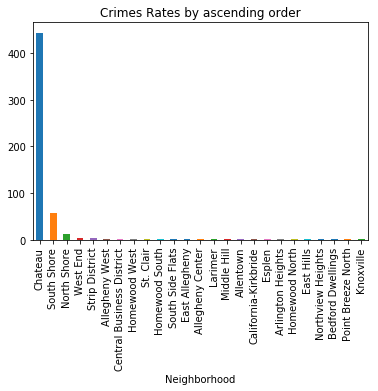

In [42]:
total_crimes_as.loc[:,'Crimes Rate'].plot(kind="bar", title = "Crimes Rates by ascending order")
plt.show()

#### reorder the Crimes Rate by descending
    Swisshelm Park has lowest crimes rate

In [43]:
total_crimes_de = total_crimes.sort_values('Crimes Rate', ascending = True).head(25)
total_crimes_de

,Total Crimes,Total Population,Crimes Rate
Neighborhood,,,
Swisshelm Park,246,1345.0,0.182900
New Homestead,190,973.0,0.195272
Squirrel Hill North,2511,11336.0,0.221507
Stanton Heights,1079,4761.0,0.226633
Duquesne Heights,589,2522.0,0.233545
Greenfield,1864,7690.0,0.242393
Banksville,939,3858.0,0.243390
Summer Hill,295,1191.0,0.247691
Morningside,849,3262.0,0.260270


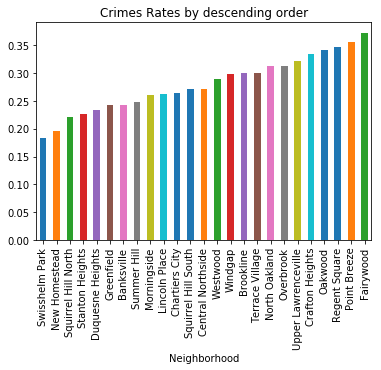

In [44]:
total_crimes_de.loc[:,'Crimes Rate'].plot(kind="bar", title = "Crimes Rates by descending order")
plt.show()

Side by side bar graph of Total Population and Total Crime, y is Total populaiton, x is Total Crime.

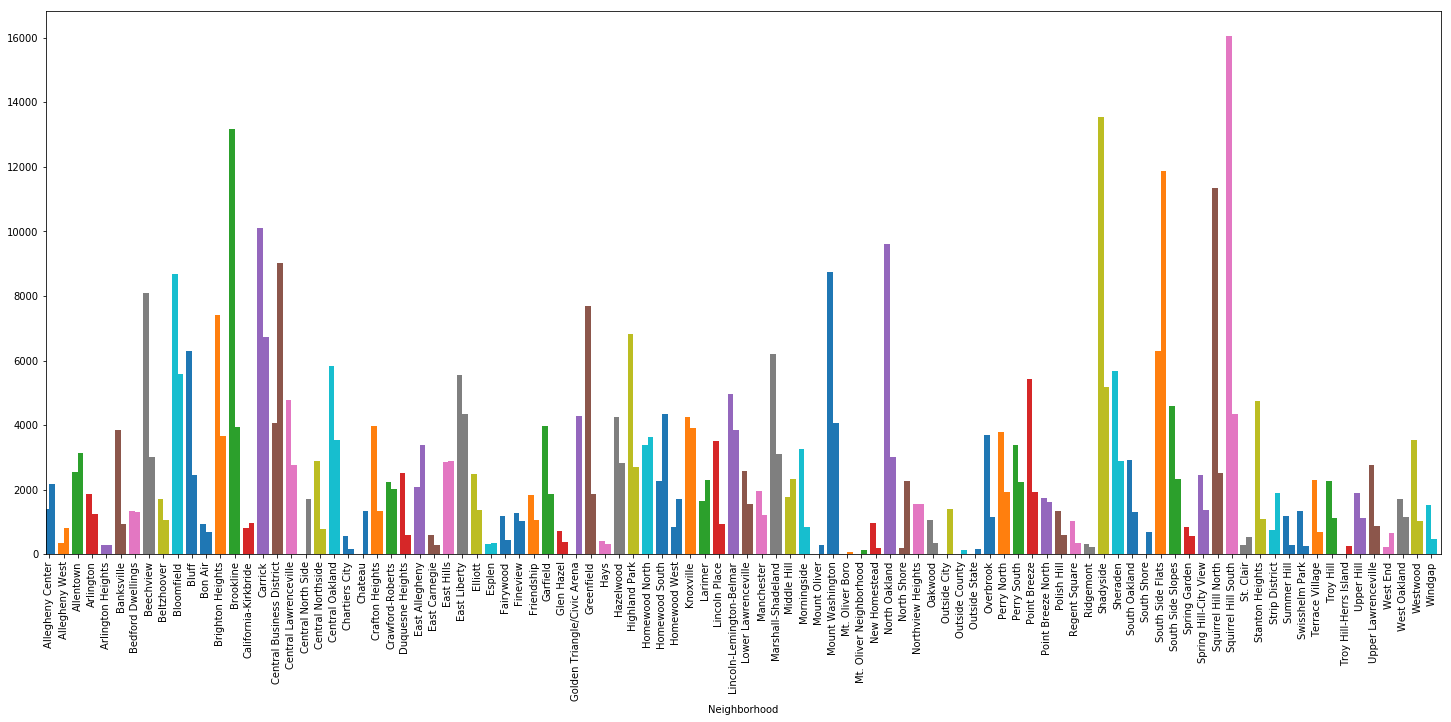

In [45]:
total_crimes['Total Population'].plot(kind="bar", width = .4, figsize=(25,10), position=1)
total_crimes['Total Crimes'].plot(kind="bar", width = .4, position=0)

#### Median Age at Death

In [46]:
death = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv",
                           parse_dates=True)
# make new dataframe
death = death[["NEIGHBORHOOD", "TOTAL MD AGE AT DEATH"]]
death = death.dropna()  #drop none 
death = death[(death != 0).all(1)] # drop 0
age = death.rename(columns={'NEIGHBORHOOD':'Neighborhood', 'TOTAL MD AGE AT DEATH':'Median Age at Death'})
#age = age.groupby('Neighborhood').count()
age.set_index("Neighborhood", inplace = True)
age.index = age.index.str.capitalize() 
#age.head()
top_age = age.sort_values('Median Age at Death', ascending = False).head(20)
top_age


,Median Age at Death
Neighborhood,
Squirrel hill south,85.9
North oakland,85.6
Banksville,85.5
Point breeze,85.1
Squirrel hill north,85.0
Central oakland,84.0
New homestead,83.4
Swisshelm park,83.1
Overbrook,82.2


squrirrel hill south has highest median age at death

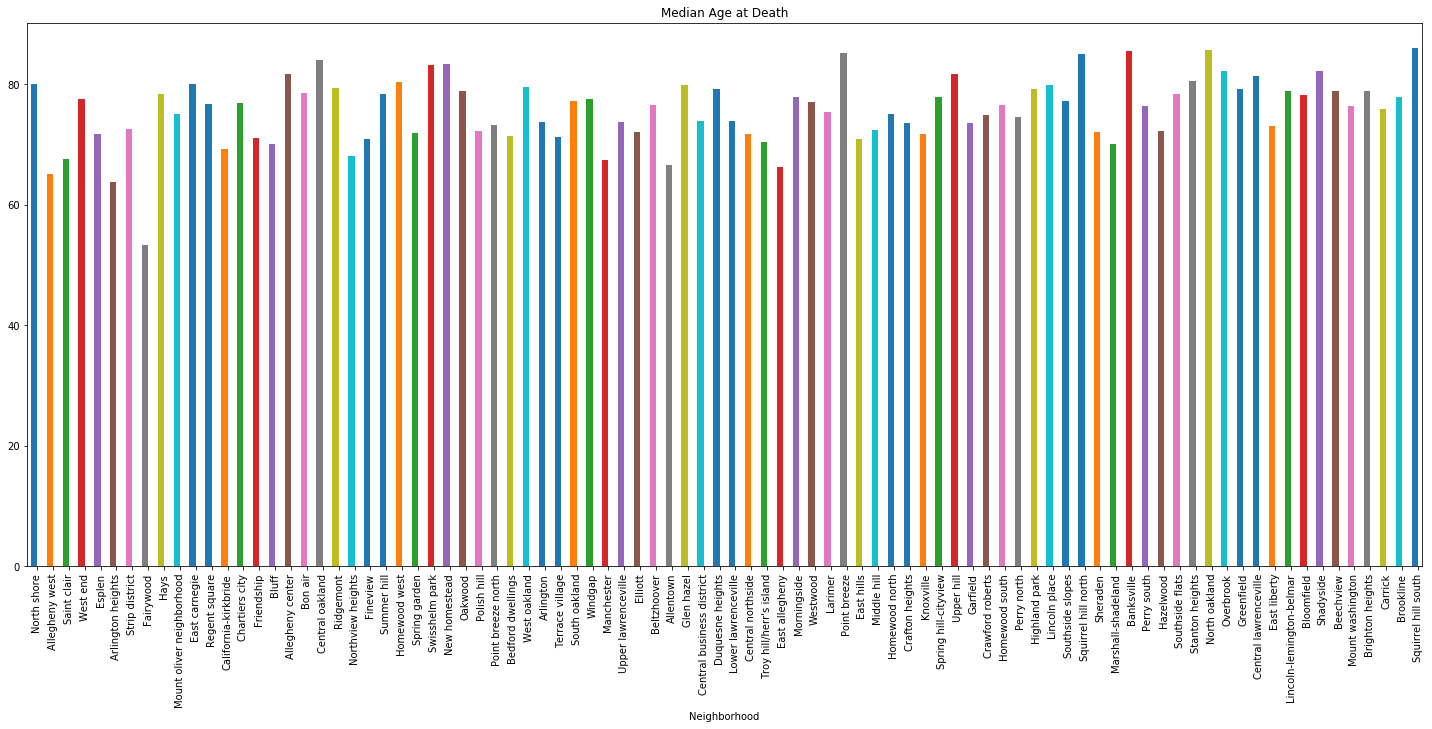

In [47]:
age.loc[:,'Median Age at Death'].plot(kind="bar", title = "Median Age at Death",width = 0.4, figsize=(25,10), position=1)
plt.show()

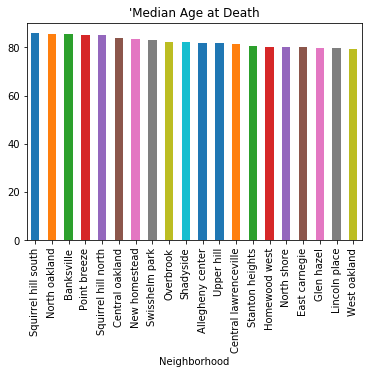

In [48]:
top_age.loc[:,'Median Age at Death'].plot(kind="bar", title = "'Median Age at Death")
plt.show()

Fairywood has lowest median age at death

In [49]:
low_age = age.sort_values('Median Age at Death', ascending = True).head(20)
low_age

,Median Age at Death
Neighborhood,
Fairywood,53.3
Arlington heights,63.7
Allegheny west,65.0
East allegheny,66.2
Allentown,66.5
Manchester,67.4
Saint clair,67.5
Northview heights,68.0
California-kirkbride,69.3


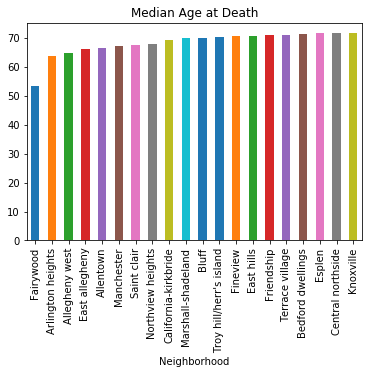

In [50]:
low_age.loc[:,'Median Age at Death'].plot(kind="bar", title = 'Median Age at Death')
plt.show()

#### Combine all factor together as a whole chart

In [104]:
#total_crimes['Total Population'] = total_pop['Total Population']
#whole = pd.DataFrame
total_crimes['Crimes Rate'] = total_crimes.loc[:,"Total Crimes"]/total_crimes.loc[:,'Total Population']
total_crimes['Median Age at Death'] = age['Median Age at Death']
total_crimes = total_crimes.dropna()
#whole = total_crimes.copy()
#total_crimes.head()
whole = total_crimes.copy()
whole.head()

,Total Crimes,Total Population,Crimes Rate,Median Age at Death
Neighborhood,,,,
Allentown,3139,2558.0,1.227131,66.5
Arlington,1256,1852.0,0.678186,73.7
Banksville,939,3858.0,0.243390,85.5
Beechview,3017,8078.0,0.373484,78.9
Beltzhoover,1072,1702.0,0.629847,76.6


In [112]:
#whole['score'] = whole.loc[:,"Crimes Rate"]+whole.loc[:,'Median Age at Death']
#whole.head(10)

## lowest crime rate

In [105]:
low_rate = whole.sort_values('Crimes Rate', ascending = True).head(5)
low_rate

,Total Crimes,Total Population,Crimes Rate,Median Age at Death
Neighborhood,,,,
Greenfield,1864,7690.0,0.242393,79.2
Banksville,939,3858.0,0.243390,85.5
Morningside,849,3262.0,0.260270,77.8
Westwood,1024,3537.0,0.289511,77.0
Windgap,459,1534.0,0.299218,77.5


### Highest median age at death

In [106]:
high_age = whole.sort_values('Median Age at Death', ascending = False).head(5)
#high_age = high_age.reset_index()
#high_age["num"] = high_age.index
high_age

,Total Crimes,Total Population,Crimes Rate,Median Age at Death
Neighborhood,,,,
Banksville,939,3858.0,0.243390,85.5
Overbrook,1155,3682.0,0.313688,82.2
Shadyside,5171,13562.0,0.381286,82.1
Ridgemont,212,314.0,0.675159,79.3
Greenfield,1864,7690.0,0.242393,79.2


# Banksville WIN!!!!